Import the libraries that are necessary for the next step of the quantitative analysis

In [118]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import tqdm as tqdm

In [119]:
import matplotlib.pyplot as plt
from model import spot

# Temp

Detection of the outliers in an interval of time (from 1st January 2014) through SPOT

  8%|▊         | 260/3326 [00:00<00:01, 2503.69it/s]

Initial threshold : {'up': 3.1433230590000534, 'down': -2.488465275999957}
Number of peaks : {'up': 78, 'down': 78}
Grimshaw maximum log-likelihood estimation ... [done]
	          Parameters               Upper               Lower
	------------------------------------------------------------
	                   γ                0.00                0.00
	                   σ                0.58                0.50
	          likelihood               35.11               23.49
	    Extreme quantile                7.52               -6.26
	------------------------------------------------------------


100%|██████████| 3326/3326 [00:05<00:00, 629.36it/s]


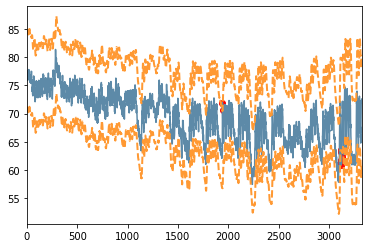

In [179]:
f = 'https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv'
P = pd.read_csv(f)

P[['date', 'time']] = P['timestamp'].str.split(' ', 1, expand=True)

P['date'] = pd.to_datetime(P['date'])
# stream
u_data = (P['date'] >= '2014-01-01')# & (P['date'] < '2014-05-21')
data = P['value'][u_data].values

# initial batch
u_init_data = (P['date'] < '2014-01-01')
init_data = P['value'][u_init_data].values

q = 1e-5 			# risk parameter
d = 10				# depth
s = spot.bidSPOT(q,d) 	# bidSPOT object
s.fit(init_data,data) 	# data import
s.initialize() 			# initialization step
results = s.run() 	# run
s.plot(results) 		   # plot

Take only rows from 1st January 2014

In [227]:
df = P[u_data]
df.describe()

,value
count,3326.000000
mean,69.441346
std,4.262653
min,57.458406
25%,66.241963
50%,70.016692
75%,72.686031
max,81.376188


In [229]:
from statistics import mean
print("mean of lower threshold : "+ str(mean(results['lower_thresholds'])))
print("mean of upper threshold : "+ str(mean(df['value'])))
print("mean of upper threshold : "+ str(mean(results['upper_thresholds'])))

mean of lower threshold : 63.24212046098561
mean of upper threshold : 69.44134633176488
mean of upper threshold : 77.64891703272487


Take the outliers

In [232]:
out = df.iloc[results['alarms']]
display(out)

,timestamp,value,date,time
5883,2014-03-24 19:00:00,71.943363,2014-03-24,19:00:00
5884,2014-03-24 20:00:00,70.715643,2014-03-24,20:00:00
7057,2014-05-19 22:00:00,63.165813,2014-05-19,22:00:00
7058,2014-05-19 23:00:00,63.475736,2014-05-19,23:00:00
7059,2014-05-20 00:00:00,63.468952,2014-05-20,00:00:00
7060,2014-05-20 01:00:00,61.429207,2014-05-20,01:00:00
7061,2014-05-20 02:00:00,61.677083,2014-05-20,02:00:00
7062,2014-05-20 03:00:00,61.786936,2014-05-20,03:00:00
7063,2014-05-20 04:00:00,60.885550,2014-05-20,04:00:00
7064,2014-05-20 05:00:00,61.499938,2014-05-20,05:00:00


In [233]:
out.describe()

,value
count,15.000000
mean,63.410162
std,3.345069
min,60.885550
25%,61.485389
50%,62.306267
75%,63.434908
max,71.943363


Add a column for outliers

In [241]:
df['outlier'] = np.zeros(df.shape[0])
for a in results['alarms']:
  df['outlier'].iloc[a] = 1
display(df[df['outlier']==1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,timestamp,value,date,time,outlier
5883,2014-03-24 19:00:00,71.943363,2014-03-24,19:00:00,1.0
5884,2014-03-24 20:00:00,70.715643,2014-03-24,20:00:00,1.0
7057,2014-05-19 22:00:00,63.165813,2014-05-19,22:00:00,1.0
7058,2014-05-19 23:00:00,63.475736,2014-05-19,23:00:00,1.0
7059,2014-05-20 00:00:00,63.468952,2014-05-20,00:00:00,1.0
7060,2014-05-20 01:00:00,61.429207,2014-05-20,01:00:00,1.0
7061,2014-05-20 02:00:00,61.677083,2014-05-20,02:00:00,1.0
7062,2014-05-20 03:00:00,61.786936,2014-05-20,03:00:00,1.0
7063,2014-05-20 04:00:00,60.885550,2014-05-20,04:00:00,1.0
7064,2014-05-20 05:00:00,61.499938,2014-05-20,05:00:00,1.0


Show outliers over time

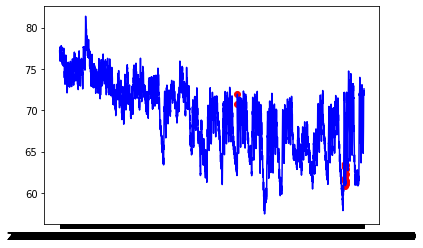

In [225]:
fig, ax = plt.subplots()

a = df.loc[df['outlier'] == 1, ['timestamp', 'value']] #anomaly

ax.plot(df['timestamp'], df['value'], color='blue')
ax.scatter(a['timestamp'],a['value'], color='red')
plt.show()

focus on the week with more outliers

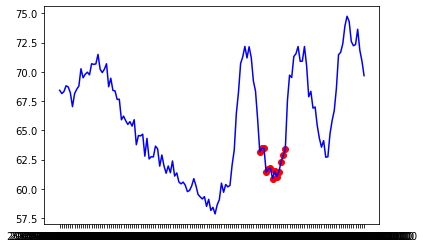

In [248]:
fig, ax = plt.subplots()

df2 = df[(df['date'] >= '2014-05-16') & (df['date']<'2014-05-22')]

a = df2.loc[df2['outlier'] == 1, ['timestamp', 'value']] #anomaly

ax.plot(df2['timestamp'], df2['value'], color='blue')
ax.scatter(a['timestamp'],a['value'], color='red')
plt.show()

Show frequence of outliers for temperature

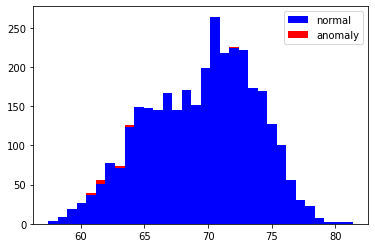

In [226]:
a = df.loc[df['outlier'] == 0, 'value']
b = df.loc[df['outlier'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

# aws

 13%|█▎        | 271/2060 [00:00<00:01, 1168.41it/s]

Initial threshold : {'up': 3.816999999999844, 'down': -3.7194000000001566}
Number of peaks : {'up': 39, 'down': 39}
Grimshaw maximum log-likelihood estimation ... [done]
	          Parameters               Upper               Lower
	------------------------------------------------------------
	                   γ                0.00                0.00
	                   σ                0.70                0.58
	          likelihood               24.94               17.56
	    Extreme quantile                9.11               -8.10
	------------------------------------------------------------


100%|██████████| 2060/2060 [00:01<00:00, 1717.23it/s]


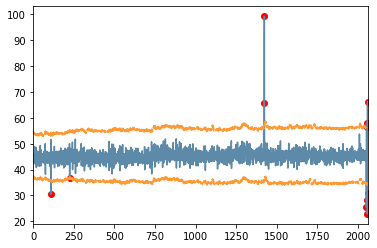

In [249]:
f = 'https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ec2_request_latency_system_failure.csv'

P = pd.read_csv(f)

P[['date', 'time']] = P['timestamp'].str.split(' ', 1, expand=True)

P['date'] = pd.to_datetime(P['date'])
# stream
u_data = (P['date'] >= '2014-03-14')# & (P['date'] < '2014-05-21')
data = P['value'][u_data].values

# initial batch
u_init_data = (P['date'] < '2014-03-14')
init_data = P['value'][u_init_data].values

q = 1e-5 			# risk parameter
d = 10				# depth
s = spot.bidSPOT(q,d) 	# bidSPOT object
s.fit(init_data,data) 	# data import
s.initialize() 			# initialization step
results = s.run() 	# run
s.plot(results) 		   # plot

In [250]:
df = P[u_data]
df.describe()

,value
count,2060.000000
mean,45.194364
std,2.619485
min,22.864000
25%,44.083000
50%,45.046000
75%,46.423000
max,99.248000


In [251]:
from statistics import mean
print("mean of lower threshold : "+ str(mean(results['lower_thresholds'])))
print("mean of upper threshold : "+ str(mean(df['value'])))
print("mean of upper threshold : "+ str(mean(results['upper_thresholds'])))

mean of lower threshold : 35.36926155756644
mean of upper threshold : 45.1943640776699
mean of upper threshold : 55.65161569348193


In [252]:
df['outlier'] = np.zeros(df.shape[0])
for a in results['alarms']:
  df['outlier'].iloc[a] = 1
display(df[df['outlier']==1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,timestamp,value,date,time,outlier
2081,2014-03-14 09:06:00,30.482,2014-03-14,09:06:00,1.0
2197,2014-03-14 18:46:00,36.890,2014-03-14,18:46:00,1.0
3394,2014-03-18 22:36:00,65.680,2014-03-18,22:36:00,1.0
3395,2014-03-18 22:41:00,99.248,2014-03-18,22:41:00,1.0
4023,2014-03-21 03:01:00,25.422,2014-03-21,03:01:00,1.0
4024,2014-03-21 03:06:00,57.958,2014-03-21,03:06:00,1.0
4025,2014-03-21 03:11:00,28.052,2014-03-21,03:11:00,1.0
4026,2014-03-21 03:16:00,56.572,2014-03-21,03:16:00,1.0
4027,2014-03-21 03:21:00,25.352,2014-03-21,03:21:00,1.0
4029,2014-03-21 03:31:00,22.864,2014-03-21,03:31:00,1.0


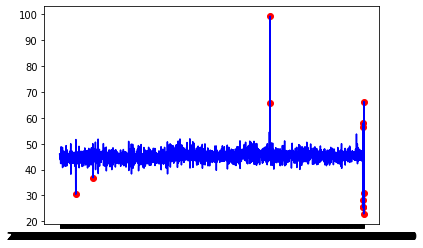

In [253]:
fig, ax = plt.subplots()

a = df.loc[df['outlier'] == 1, ['timestamp', 'value']] #anomaly

ax.plot(df['timestamp'], df['value'], color='blue')
ax.scatter(a['timestamp'],a['value'], color='red')
plt.show()

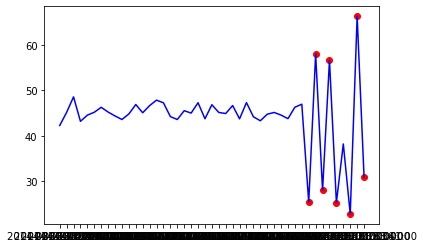

In [254]:
fig, ax = plt.subplots()

df2 = df[(df['date'] == '2014-03-21')]

a = df2.loc[df2['outlier'] == 1, ['timestamp', 'value']] #anomaly

ax.plot(df2['timestamp'], df2['value'], color='blue')
ax.scatter(a['timestamp'],a['value'], color='red')
plt.show()

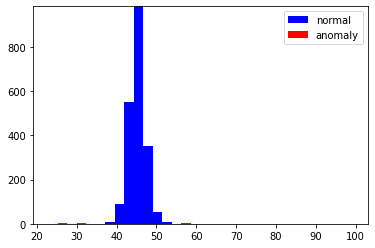

In [255]:
a = df.loc[df['outlier'] == 0, 'value']
b = df.loc[df['outlier'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

# CPU

  1%|          | 215/17776 [00:00<00:11, 1588.05it/s]

Initial threshold : {'up': 14.412399999999991, 'down': -9.45170000000002}
Number of peaks : {'up': 5, 'down': 5}
Grimshaw maximum log-likelihood estimation ... [done]
	          Parameters               Upper               Lower
	------------------------------------------------------------
	                   γ                0.00                0.00
	                   σ               10.72                1.25
	          likelihood               16.86                6.13
	    Extreme quantile               95.33              -18.90
	------------------------------------------------------------


100%|██████████| 17776/17776 [01:01<00:00, 288.85it/s]


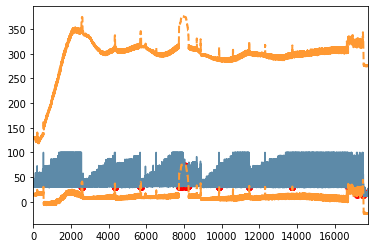

In [259]:
f = 'https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/cpu_utilization_asg_misconfiguration.csv'

P = pd.read_csv(f)

P[['date', 'time']] = P['timestamp'].str.split(' ', 1, expand=True)

P['date'] = pd.to_datetime(P['date'])
# stream
u_data = (P['date'] >= '2014-05-15')# & (P['date'] < '2014-05-21')
data = P['value'][u_data].values

# initial batch
u_init_data = (P['date'] < '2014-05-15')
init_data = P['value'][u_init_data].values

q = 1e-5 			# risk parameter
d = 10				# depth
s = spot.bidSPOT(q,d) 	# bidSPOT object
s.fit(init_data,data) 	# data import
s.initialize() 			# initialization step
results = s.run() 	# run
s.plot(results) 		   # plot

In [260]:
df = P[u_data]
df.describe()

,value
count,17776.000000
mean,38.334364
std,15.726336
min,11.529000
25%,30.783750
50%,32.000000
75%,35.666000
max,100.000000


In [261]:
from statistics import mean
print("mean of lower threshold : "+ str(mean(results['lower_thresholds'])))
print("mean of upper threshold : "+ str(mean(df['value'])))
print("mean of upper threshold : "+ str(mean(results['upper_thresholds'])))

mean of lower threshold : 12.664299012943752
mean of upper threshold : 38.334364350810084
mean of upper threshold : 298.6025879070889


In [262]:
df['outlier'] = np.zeros(df.shape[0])
for a in results['alarms']:
  df['outlier'].iloc[a] = 1
display(df[df['outlier']==1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,timestamp,value,date,time,outlier
2836,2014-05-23 21:34:00,31.9345,2014-05-23,21:34:00,1.0
2837,2014-05-23 21:39:00,31.2860,2014-05-23,21:39:00,1.0
2838,2014-05-23 21:44:00,33.1478,2014-05-23,21:44:00,1.0
2839,2014-05-23 21:49:00,32.6650,2014-05-23,21:49:00,1.0
2840,2014-05-23 21:54:00,31.8340,2014-05-23,21:54:00,1.0
...,...,...,...,...,...
17795,2014-07-14 20:09:00,14.8390,2014-07-14,20:09:00,1.0
17796,2014-07-14 20:14:00,14.7130,2014-07-14,20:14:00,1.0
17797,2014-07-14 20:19:00,14.2860,2014-07-14,20:19:00,1.0
17798,2014-07-14 20:24:00,18.2140,2014-07-14,20:24:00,1.0


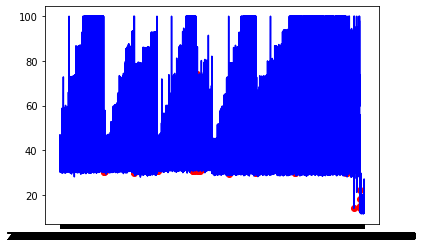

In [263]:
fig, ax = plt.subplots()

a = df.loc[df['outlier'] == 1, ['timestamp', 'value']] #anomaly

ax.plot(df['timestamp'], df['value'], color='blue')
ax.scatter(a['timestamp'],a['value'], color='red')
plt.show()


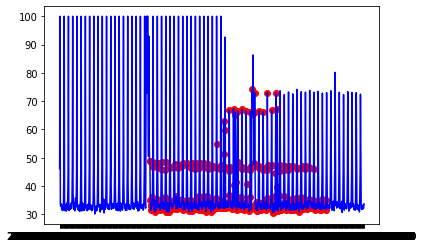

In [269]:
fig, ax = plt.subplots()

df2 = df[(df['date'] >= '2014-06-10') & (df['date'] <= '2014-06-12')]

a = df2.loc[df2['outlier'] == 1, ['timestamp', 'value']] #anomaly

ax.plot(df2['timestamp'], df2['value'], color='blue')
ax.scatter(a['timestamp'],a['value'], color='red')
plt.show()

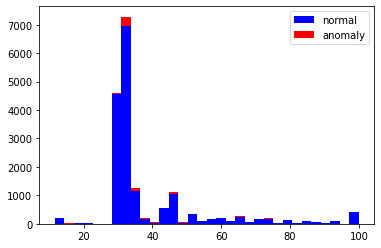

In [264]:
a = df.loc[df['outlier'] == 0, 'value']
b = df.loc[df['outlier'] == 1, 'value']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()